# Multiple linear regression (on means)

## Redis YCSB 6x10min

In [1]:
from helpers.helpers_old import (
    draw_regression_graph,
    get_means,
    get_means_with_cpu,
    fit_regression,
)

experiments_path = '../../data'
experiment_name = 'redis_ycsb_6x10'

exp_name, df = next(get_means_with_cpu(experiment_name, experiments_path))

### `app_latency` ~ `instances_n`

In [2]:
results = fit_regression(df, 'app_latency ~ instances_n')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     111.1
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           0.000458
Time:                        15:44:09   Log-Likelihood:                 28.755
No. Observations:                   6   AIC:                            -53.51
Df Residuals:                       4   BIC:                            -53.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0690      0.002     30.169      

/home/godul/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### `app_latency` ~ `cpu`

In [3]:
results = fit_regression(df, 'app_latency ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     122.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           0.000382
Time:                        15:44:09   Log-Likelihood:                 29.025
No. Observations:                   6   AIC:                            -54.05
Df Residuals:                       4   BIC:                            -54.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0664      0.002     27.729      0.0

/home/godul/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### `app_latency` ~ `instances_n` + `cpu`

In [4]:
results = fit_regression(df, 'app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     47.66
Date:                Thu, 29 Oct 2020   Prob (F-statistic):            0.00533
Time:                        15:44:09   Log-Likelihood:                 29.145
No. Observations:                   6   AIC:                            -52.29
Df Residuals:                       3   BIC:                            -52.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0673      0.004     18.465      

/home/godul/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### Single variable plots

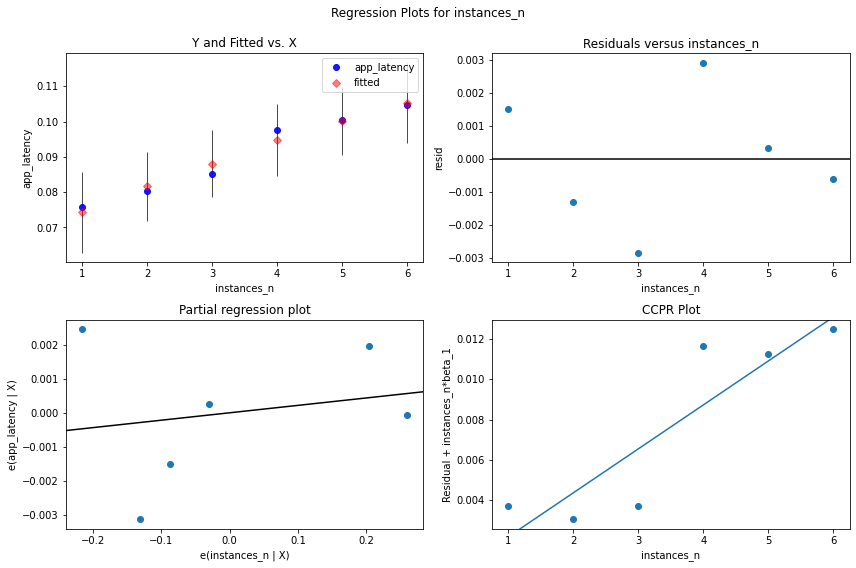

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

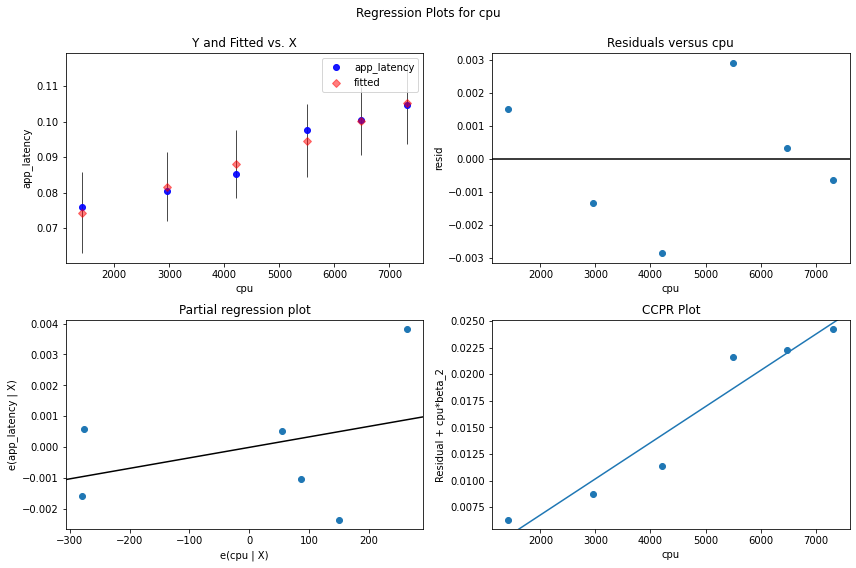

In [6]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### Compare single and multiple regression

<AxesSubplot:title={'center':'Adjusted R Squared for single and multiple regression'}, xlabel='x'>

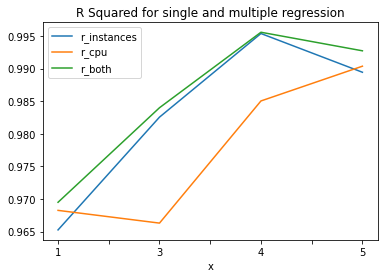

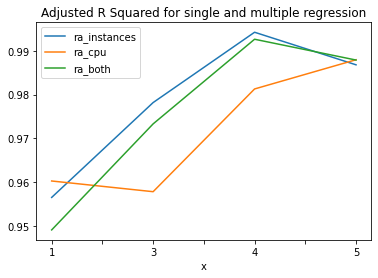

In [7]:
from collections import defaultdict
import pandas as pd

experiment_name = 'redis_ycsb_6x10'

d = defaultdict(list)

for exp_name, df in get_means_with_cpu(experiment_name, experiments_path):
    results = fit_regression(df, 'app_latency ~ instances_n')
    d['r_instances'].append(results.rsquared)
    d['ra_instances'].append(results.rsquared_adj)
    
    results = fit_regression(df, 'app_latency ~ cpu')
    d['r_cpu'].append(results.rsquared)
    d['ra_cpu'].append(results.rsquared_adj)
    
    results = fit_regression(df, 'app_latency ~ instances_n + cpu')
    d['r_both'].append(results.rsquared)
    d['ra_both'].append(results.rsquared_adj)
    
    d['x'].append(exp_name[-1:])

df = pd.DataFrame(d)

df_r = df.get(['x', 'r_instances', 'r_cpu', 'r_both'])
df_r.plot(x='x', title='R Squared for single and multiple regression')

df_r = df.get(['x', 'ra_instances', 'ra_cpu', 'ra_both'])
df_r.plot(x='x', title='Adjusted R Squared for single and multiple regression')

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     381.7
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.05e-05
Time:                        15:44:11   Log-Likelihood:                -40.500
No. Observations:                   6   AIC:                             85.00
Df Residuals:                       4   BIC:                             84.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     509.2218    235.612      2.161      

/home/godul/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


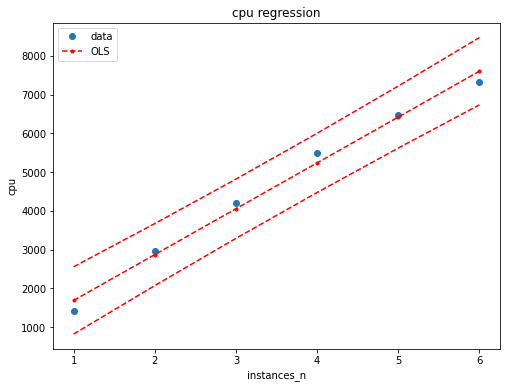

In [8]:
experiment_name = 'redis_ycsb_6x10'

exp_name, df = next(get_means_with_cpu(experiment_name, experiments_path))

results = fit_regression(df, 'cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Redis YCSB 12x10min

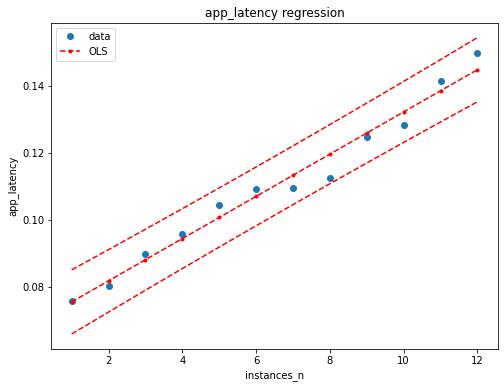

In [9]:
experiment_name = 'redis_ycsb_12x10'


exp_name, df = next(get_means_with_cpu(experiment_name, experiments_path, instances_n=12))
results = fit_regression(df, 'app_latency ~ instances_n')

draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')

### `app_latency` ~ `instances_n`

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     398.1
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.20e-09
Time:                        15:44:11   Log-Likelihood:                 51.007
No. Observations:                  12   AIC:                            -98.01
Df Residuals:                      10   BIC:                            -97.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0691      0.002     29.716      

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### `app_latency` ~ `cpu`

In [11]:
results = fit_regression(df, 'app_latency ~ cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     92.04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.32e-06
Time:                        15:44:11   Log-Likelihood:                 42.690
No. Observations:                  12   AIC:                            -81.38
Df Residuals:                      10   BIC:                            -80.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0571      0.006      9.631      0.0

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### `app_latency` ~ `instances_n` + `cpu`

In [12]:
results = fit_regression(df, 'app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     190.4
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.32e-08
Time:                        15:44:11   Log-Likelihood:                 51.363
No. Observations:                  12   AIC:                            -96.73
Df Residuals:                       9   BIC:                            -95.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0715      0.004     17.715      

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


### Single variable plots

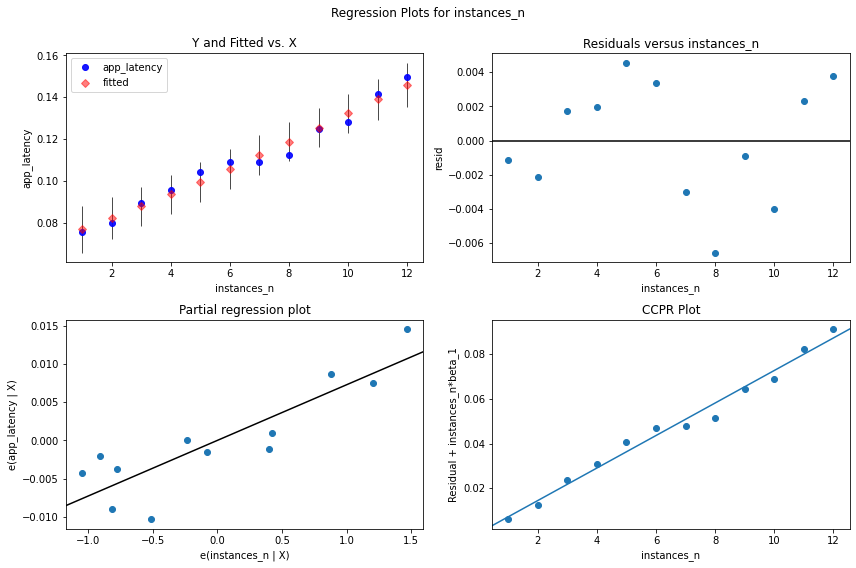

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

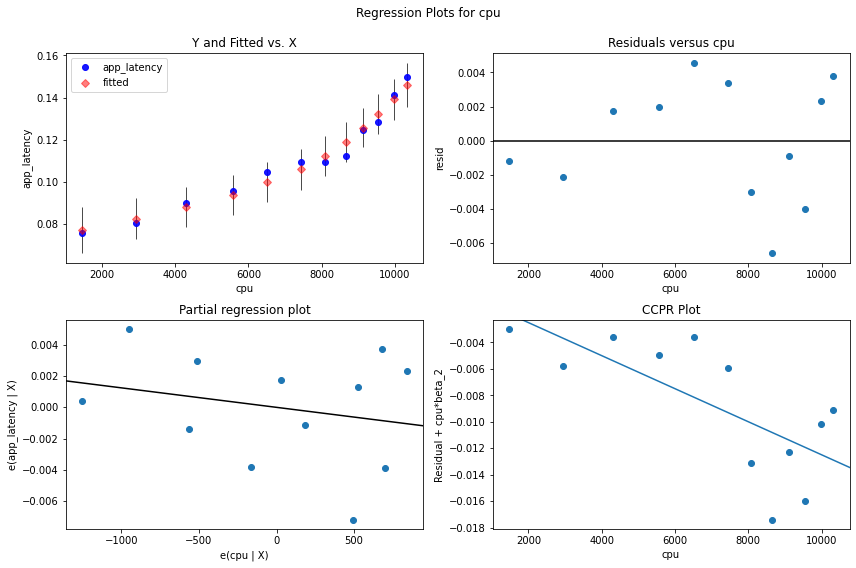

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)